# Importing all libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df1 = pd.read_csv(r"C:\Users\ADMIN\Downloads\movie_data\links.csv")

In [19]:
df1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
df2 = pd.read_csv(r"C:\Users\ADMIN\Downloads\movie_data\movies.csv")

In [20]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
df3 = pd.read_csv(r"C:\Users\ADMIN\Downloads\movie_data\ratings.csv")

In [21]:
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
df4 = pd.read_csv(r"C:\Users\ADMIN\Downloads\movie_data\tags.csv")

In [22]:
df4.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# What is the shape of "movies.csv"?


In [25]:
df2.shape

(9742, 3)

# What is the shape of "ratings.csv"?


In [26]:
df3.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?

In [27]:
unique_user_ids = df3['userId'].nunique()

In [28]:
unique_user_ids

610

# Which movie has recieved maximum number of user ratings?


In [46]:
 merged_df = pd.merge(df2, df3, on=['movieId'])

In [47]:
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [48]:

ratings_count = merged_df.groupby('title')['rating'].count()

# Find the movie with the maximum number of ratings
max_ratings_movie = ratings_count.idxmax()

# Print the movieId and its corresponding count
print("Movie with maximum number of ratings:")
print(f"Movie: {max_ratings_movie}")
print(f"Number of Ratings: {ratings_count[max_ratings_movie]}")


Movie with maximum number of ratings:
Movie: Forrest Gump (1994)
Number of Ratings: 329


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [49]:
tags_df = pd.merge(merged_df, df4, on=['movieId'])

In [52]:
matrix_tags = tags_df[tags_df['title'] == 'Matrix, The (1999)']

# Extract unique tags for the movie
unique_tags = matrix_tags['tag'].unique()

# Display the result
print("Tags for 'Matrix, The (1999)':")
print(unique_tags)

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [53]:
terminator_2_ratings = tags_df[tags_df['title'] == 'Terminator 2: Judgment Day (1991)']

# Calculate the average user rating
average_rating = terminator_2_ratings['rating'].mean()

# Display the result
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

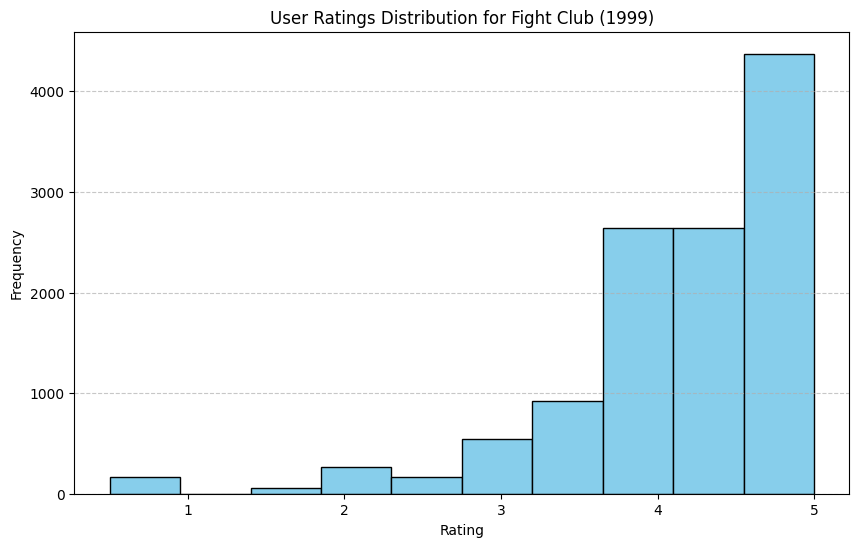

In [55]:
# Filter rows for "Fight Club (1999)" movie
fight_club_ratings = tags_df[tags_df['title'] == 'Fight Club (1999)']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Which movie is the most popular based on  average user ratings?


In [58]:

# Assuming df2 is the movies dataframe and df3 is the ratings dataframe

# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = df3.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(df2, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the resulting dataframe
filtered_df.head()


,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [59]:
# Find the movie with the highest average rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

# Display the most popular movie
print("Most Popular Movie based on Average User Ratings:")
print(most_popular_movie[['title', 'rating_mean']])


Most Popular Movie based on Average User Ratings:
title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [60]:

# Sort the dataframe based on the rating_count in descending order
top_movies_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies based on number of user ratings
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_movies_by_ratings[['title', 'rating_count']])

Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [61]:
# Filter the dataframe to include only Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies based on the rating_count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Find the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the third most popular Sci-Fi movie
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])


Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


# Mention the movieId of the movie which has the highest IMDB rating.

In [74]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})
        return imdb_rating.text if imdb_rating else np.nan
    else:
        print(f"Failed to fetch data for IMDb ID: {imdbId}")
        return np.nan


In [ ]:

df1['imdb_rating'] = df1['imdbId'].head(5).apply(scrapper)
df_merged = pd.merge(filtered_df.head(5), df1.head(5), on='movieId', how='inner')

# Convert imdb_rating to numeric for sorting
df_merged['imdb_rating'] = pd.to_numeric(df_merged['imdb_rating'], errors='coerce')

# Find the movie with the highest IMDb rating
highest_rated_movie = df_merged.loc[df_merged['imdb_rating'].idxmax()]

# Print the movieId of the highest-rated movie
print("MovieId of the movie with the highest IMDb rating:", highest_rated_movie['movieId'])


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.